In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [3]:
df = pd.read_csv("../../data/data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.drop_duplicates(inplace=True)


In [5]:
df = df.reset_index(drop=False)
df.head()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     302 non-null    int64  
 1   age       302 non-null    int64  
 2   sex       302 non-null    int64  
 3   cp        302 non-null    int64  
 4   trestbps  302 non-null    int64  
 5   chol      302 non-null    int64  
 6   fbs       302 non-null    int64  
 7   restecg   302 non-null    int64  
 8   thalach   302 non-null    int64  
 9   exang     302 non-null    int64  
 10  oldpeak   302 non-null    float64
 11  slope     302 non-null    int64  
 12  ca        302 non-null    int64  
 13  thal      302 non-null    int64  
 14  target    302 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.5 KB


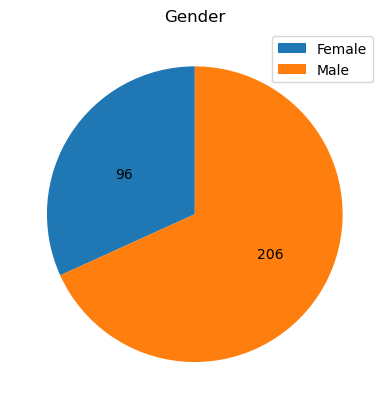

In [7]:
gender_cnt =df.groupby(by=["sex"]).count()["index"].to_numpy()
plt.pie(x=gender_cnt,startangle=90,labels=gender_cnt,labeldistance=0.5) # type: ignore
plt.legend(labels=["Female", "Male"])
plt.title("Gender")
plt.show()

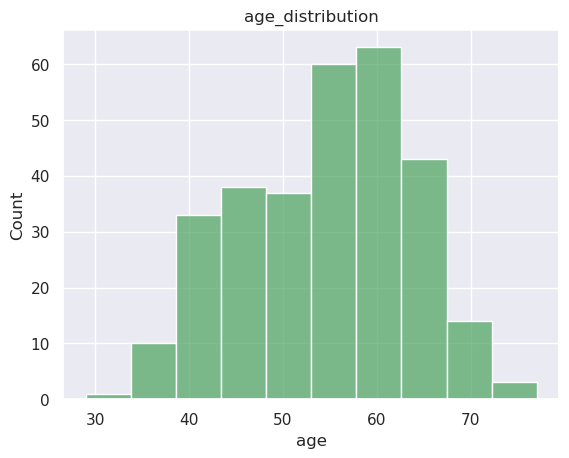

In [8]:
sns.set_theme("notebook")
sns.set_style("darkgrid")
plt.title("age_distribution")

sns.histplot(df,x="age",color="g",bins=10,kde=False,stat="count",cumulative=False)


plt.show()

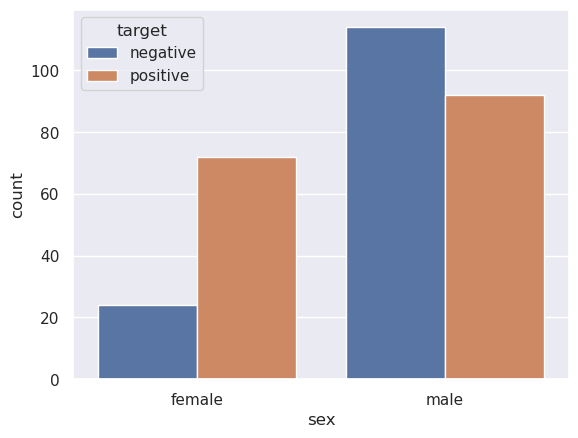

In [9]:
x = df.groupby(by=["sex", "target"]).count()["index"]


g = sns.countplot(df, x="sex", hue="target")
g.legend(labels=["negative","positive"]).set_title("target")
g.set_xticks([0, 1], ["female", "male"])
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     302 non-null    int64  
 1   age       302 non-null    int64  
 2   sex       302 non-null    int64  
 3   cp        302 non-null    int64  
 4   trestbps  302 non-null    int64  
 5   chol      302 non-null    int64  
 6   fbs       302 non-null    int64  
 7   restecg   302 non-null    int64  
 8   thalach   302 non-null    int64  
 9   exang     302 non-null    int64  
 10  oldpeak   302 non-null    float64
 11  slope     302 non-null    int64  
 12  ca        302 non-null    int64  
 13  thal      302 non-null    int64  
 14  target    302 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.5 KB


In [11]:
df["age_group"] = pd.cut(df["age"],bins=[20,30,40,50,60,70,80])

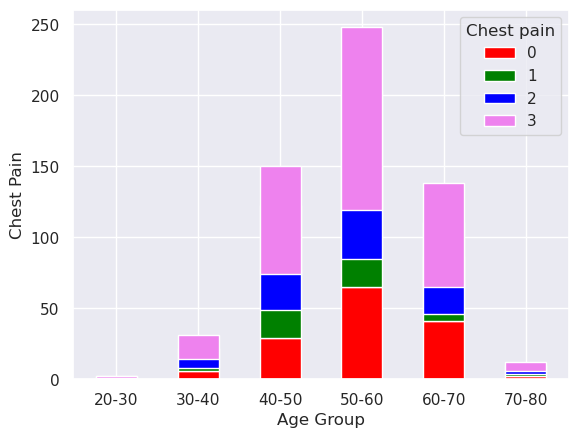

In [12]:
age_cp = df.groupby(by=["age_group", "cp"], observed=False).count()[
    "index"].to_numpy()
age_cp = age_cp.reshape(
    (len(df["age_group"].unique()), len(df["cp"].unique())))
age_cp = np.cumsum(age_cp, axis=1)

x = list(map(lambda x: f'{x.left}-{x.right}', np.sort(df["age_group"].unique())))
g = plt.bar(x=x, height=age_cp[:, 0], width=0.5, color="red")
i = plt.bar(x=x, height=age_cp[:, 1], width=0.5,
            color="green", bottom=age_cp[:, 0])
j = plt.bar(x=x, height=age_cp[:, 2], width=0.5,
            color="blue", bottom=age_cp[:, 1])
k = plt.bar(x=x, height=age_cp[:, 3], width=0.5,
            color="violet", bottom=age_cp[:, 2])
plt.xlabel("Age Group")
plt.ylabel("Chest Pain")
plt.legend(labels=["0","1","2","3"]).set_title("Chest pain")
plt.show()

/tmp/ipykernel_138472/1080242486.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(["Female","Male"])


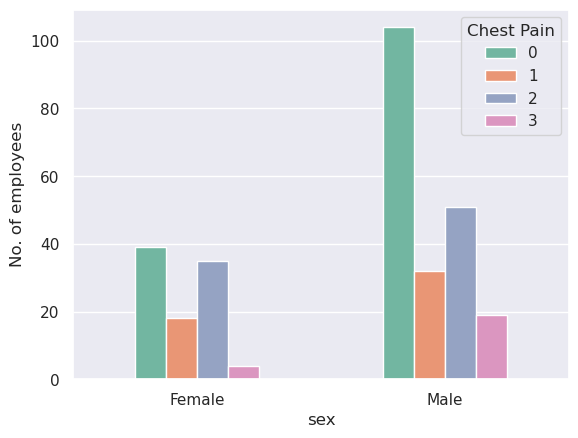

In [13]:
g = sns.barplot(data=df.groupby(by=["sex", "cp"], observed=False).count(),
            x="sex",
            y="index",
            hue="cp", dodge=True,
            width=0.5,
            palette="Set2"
            )
g.set_xticklabels(["Female","Male"])
g.legend().set_title("Chest Pain")
g.set_ylabel("No. of employees")
plt.show()

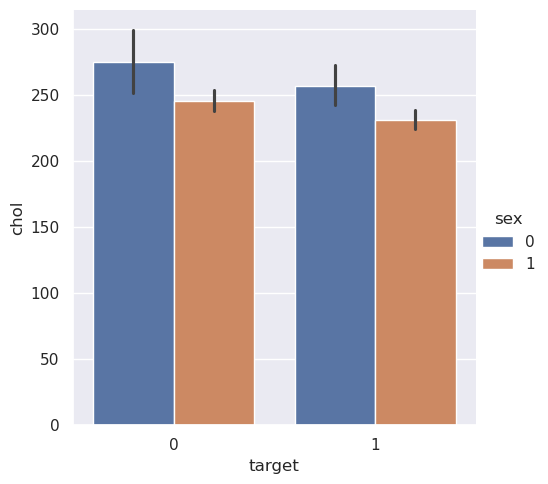

In [14]:
sns.catplot(df,x="target",y="chol",hue="sex",kind="bar",estimator="mean")
plt.show()

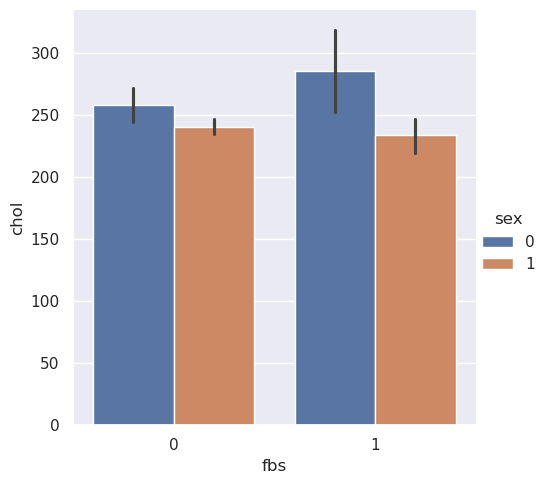

In [15]:
sns.catplot(df,x="fbs",y="chol",hue="sex",kind="bar",estimator="mean")
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   index      302 non-null    int64   
 1   age        302 non-null    int64   
 2   sex        302 non-null    int64   
 3   cp         302 non-null    int64   
 4   trestbps   302 non-null    int64   
 5   chol       302 non-null    int64   
 6   fbs        302 non-null    int64   
 7   restecg    302 non-null    int64   
 8   thalach    302 non-null    int64   
 9   exang      302 non-null    int64   
 10  oldpeak    302 non-null    float64 
 11  slope      302 non-null    int64   
 12  ca         302 non-null    int64   
 13  thal       302 non-null    int64   
 14  target     302 non-null    int64   
 15  age_group  302 non-null    category
dtypes: category(1), float64(1), int64(14)
memory usage: 36.1 KB


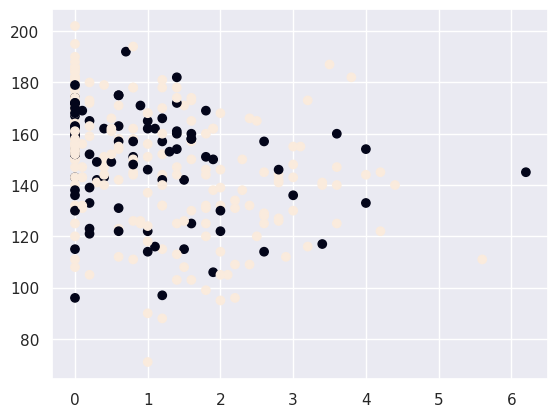

In [17]:
plt.scatter(df["oldpeak"], df["thalach"],c=df["sex"])

plt.show()

<Axes: >

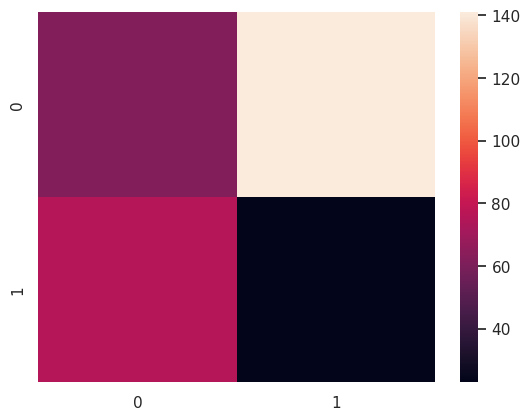

In [18]:
x = df.groupby(by=["exang", "target"]).count()

sns.heatmap(x["index"].to_numpy().reshape((2, 2)))

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   index      302 non-null    int64   
 1   age        302 non-null    int64   
 2   sex        302 non-null    int64   
 3   cp         302 non-null    int64   
 4   trestbps   302 non-null    int64   
 5   chol       302 non-null    int64   
 6   fbs        302 non-null    int64   
 7   restecg    302 non-null    int64   
 8   thalach    302 non-null    int64   
 9   exang      302 non-null    int64   
 10  oldpeak    302 non-null    float64 
 11  slope      302 non-null    int64   
 12  ca         302 non-null    int64   
 13  thal       302 non-null    int64   
 14  target     302 non-null    int64   
 15  age_group  302 non-null    category
dtypes: category(1), float64(1), int64(14)
memory usage: 36.1 KB


In [20]:
df.groupby()

TypeError: You have to supply one of 'by' and 'level'

In [ ]:
df["thal"].unique()

array([3, 2, 1, 0])

In [ ]:
df.groupby(by=["slope","target"]).count()["index"].to_numpy().reshape((3,2))


array([[ 12,   9],
       [ 91,  49],
       [ 35, 106]])

In [ ]:
df.groupby(by=["fbs", "target"]).count()["index"]

fbs  target
0    0         116
     1         141
1    0          22
     1          23
Name: index, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   index      302 non-null    int64   
 1   age        302 non-null    int64   
 2   sex        302 non-null    int64   
 3   cp         302 non-null    int64   
 4   trestbps   302 non-null    int64   
 5   chol       302 non-null    int64   
 6   fbs        302 non-null    int64   
 7   restecg    302 non-null    int64   
 8   thalach    302 non-null    int64   
 9   exang      302 non-null    int64   
 10  oldpeak    302 non-null    float64 
 11  slope      302 non-null    int64   
 12  ca         302 non-null    int64   
 13  thal       302 non-null    int64   
 14  target     302 non-null    int64   
 15  age_group  302 non-null    category
dtypes: category(1), float64(1), int64(14)
memory usage: 36.1 KB


In [ ]:
df.groupby(by=["age_group", "restecg"]).count()["index"]

/tmp/ipykernel_16723/97101883.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



age_group  restecg
(20, 30]   0           1
           1           0
           2           0
(30, 40]   0           4
           1          13
           2           0
(40, 50]   0          32
           1          44
           2           0
(50, 60]   0          67
           1          59
           2           3
(60, 70]   0          40
           1          33
           2           0
(70, 80]   0           3
           1           2
           2           1
Name: index, dtype: int64

In [ ]:
x = df.groupby(by=["restecg"])["thalach"].mean()
x

restecg
0    147.904762
1    151.821192
2    125.750000
Name: thalach, dtype: float64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   index      302 non-null    int64   
 1   age        302 non-null    int64   
 2   sex        302 non-null    int64   
 3   cp         302 non-null    int64   
 4   trestbps   302 non-null    int64   
 5   chol       302 non-null    int64   
 6   fbs        302 non-null    int64   
 7   restecg    302 non-null    int64   
 8   thalach    302 non-null    int64   
 9   exang      302 non-null    int64   
 10  oldpeak    302 non-null    float64 
 11  slope      302 non-null    int64   
 12  ca         302 non-null    int64   
 13  thal       302 non-null    int64   
 14  target     302 non-null    int64   
 15  age_group  302 non-null    category
dtypes: category(1), float64(1), int64(14)
memory usage: 36.1 KB


In [26]:
for i in df.columns:
    print(i, df[i].unique())


# continous

# 1. trestbps
# 2. chol
# 3. thalach
# 4. oldpeak
# 5. age


# discrete 
# 1. age_group
# 2. sex
# 3. cp
# 4. fbs
# 5. restecg
# 6. exang
# 7. ca
# 8. thal
# 9. target
# 10. slope


df["age"]

index [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  32  33  34  35  36  37
  38  39  40  41  42  44  45  46  47  48  49  50  51  52  53  54  56  57
  58  59  60  62  63  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  80  81  85  87  88  89  90  91  94  95  96  97  98  99 100 101 102
 104 105 106 107 108 109 110 111 113 114 116 117 119 122 123 124 125 126
 128 129 131 135 137 139 140 141 142 143 144 145 146 147 148 149 151 152
 154 156 158 159 160 161 163 166 167 168 169 170 171 172 173 174 175 177
 179 181 182 183 184 185 189 190 191 193 194 196 197 198 199 203 205 210
 212 215 216 218 220 224 225 227 228 231 232 233 234 237 239 240 244 245
 248 252 254 255 256 258 260 262 267 268 269 270 271 274 276 279 280 281
 282 286 287 288 291 292 297 299 300 301 304 305 309 313 319 320 321 322
 323 327 328 331 332 333 334 337 339 342 343 348 349 353 355 356 358 361
 363 366 367 368 369 373 374 376 377 380 382 

0      52
1      53
2      70
3      61
4      62
       ..
297    68
298    44
299    52
300    59
301    54
Name: age, Length: 302, dtype: int64

In [28]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import gaussian_kde

# Generate sample data
np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=1000)

# Create histogram
hist = go.Histogram(x=data, histnorm='density', name='Histogram')

# Calculate density curve
density = gaussian_kde(data)
x = np.linspace(min(data), max(data), 1000)
density_curve = go.Scatter(x=x, y=density(x), mode='lines', name='Density Curve')

# Create figure and add traces
fig = go.Figure()
fig.add_trace(hist)
fig.add_trace(density_curve)

# Update layout for better appearance
fig.update_layout(
    title='Histogram with Density Curve',
    xaxis_title='Value',
    yaxis_title='Density',
    bargap=0.2
)

# Show the plot
fig.show()
